### **Training N-SVM**

In [ ]:


# Train multi-class SVM with probability estimation
svm_model = SVC(kernel='rbf', probability=True)  # Choose an appropriate kernel
svm_model.fit(X_train_scaled, y_train_scaled)

# Predict class probabilities
class_probabilities = svm_model.predict_proba(X_test_scaled)

# Get unique class labels
class_labels = np.unique(y_test_scaled)

# Print probabilities with labels
for i, probs in enumerate(class_probabilities):
    print(f"Instance {i+1}:")
    for j, prob in enumerate(probs):
        print(f"  Class {class_labels[j]}: {prob:.4f}")

Streaming output truncated to the last 5000 lines.
  Class pa-Panjabi: 0.3981
  Class sd-Sindhi: 0.0208
  Class si-Sinhala: 0.0005
  Class ta-Tamil: 0.0003
  Class te-Telugu: 0.0006
  Class ur-Urdu: 0.4986
Instance 14544:
  Class as-Assamese: 0.0001
  Class bn-Bengali: 0.0000
  Class hi-Hindi: 0.0258
  Class ne-Nepali: 0.0000
  Class pa-Panjabi: 0.8968
  Class sd-Sindhi: 0.0004
  Class si-Sinhala: 0.0001
  Class ta-Tamil: 0.0000
  Class te-Telugu: 0.0001
  Class ur-Urdu: 0.0766
Instance 14545:
  Class as-Assamese: 0.0239
  Class bn-Bengali: 0.0235
  Class hi-Hindi: 0.0219
  Class ne-Nepali: 0.6370
  Class pa-Panjabi: 0.0088
  Class sd-Sindhi: 0.1024
  Class si-Sinhala: 0.0791
  Class ta-Tamil: 0.0324
  Class te-Telugu: 0.0176
  Class ur-Urdu: 0.0534
Instance 14546:
  Class as-Assamese: 0.9998
  Class bn-Bengali: 0.0000
  Class hi-Hindi: 0.0000
  Class ne-Nepali: 0.0000
  Class pa-Panjabi: 0.0000
  Class sd-Sindhi: 0.0000
  Class si-Sinhala: 0.0000
  Class ta-Tamil: 0.0002
  Class te-Te

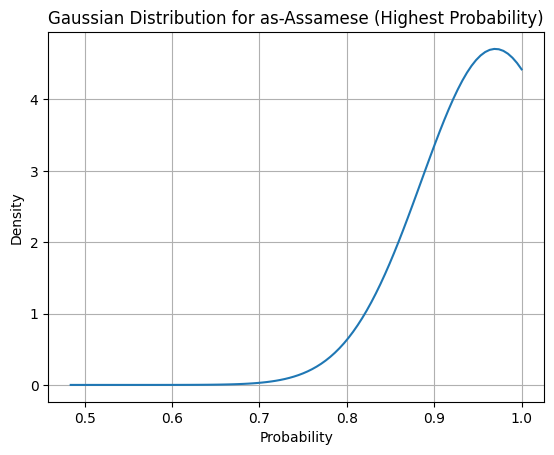

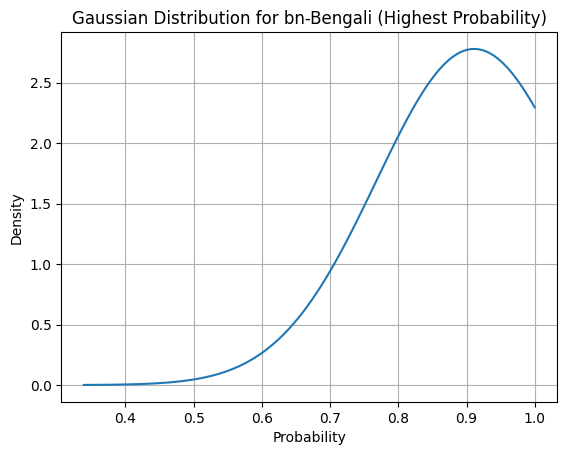

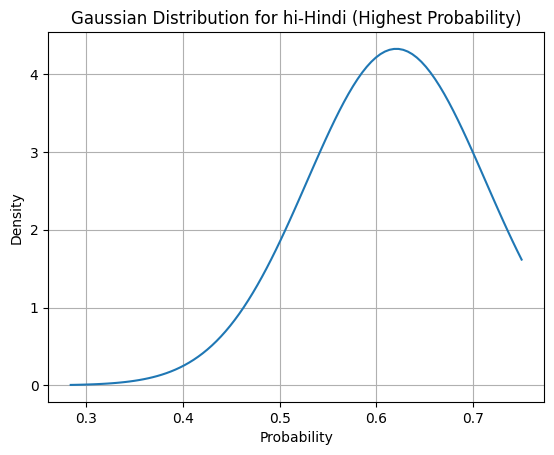

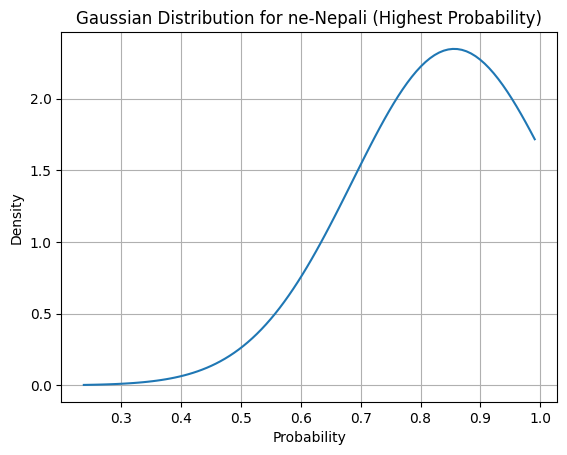

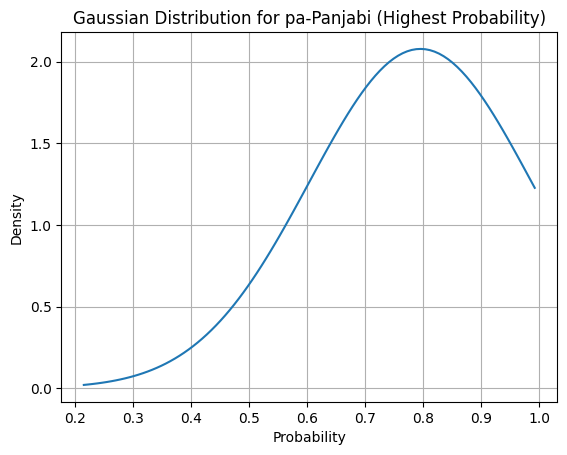

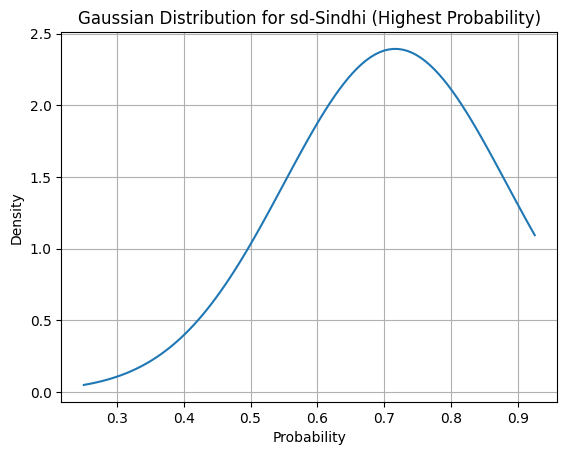

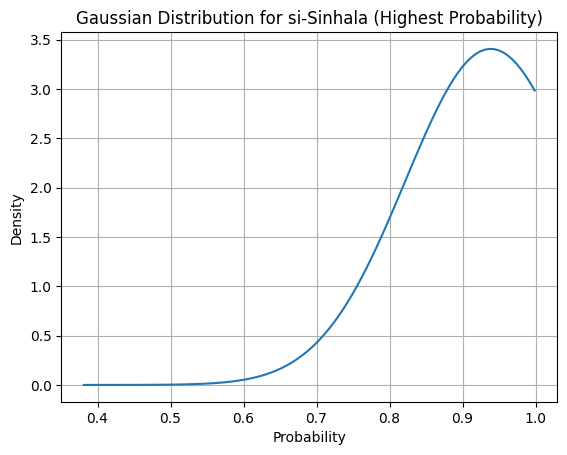

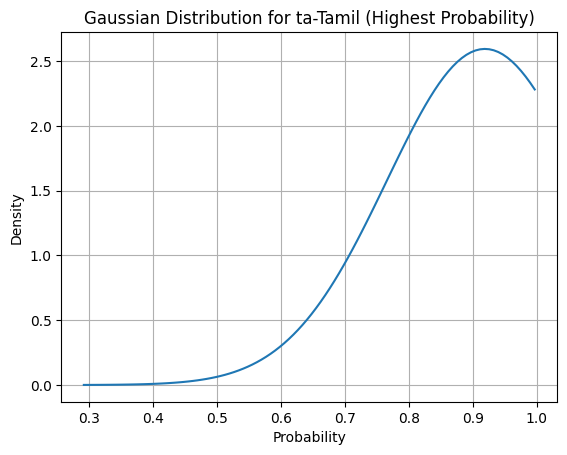

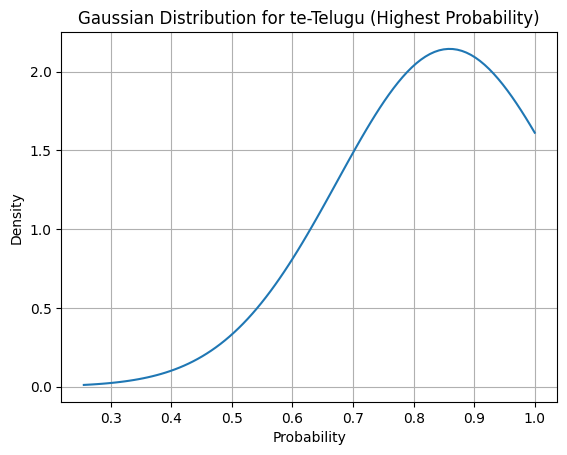

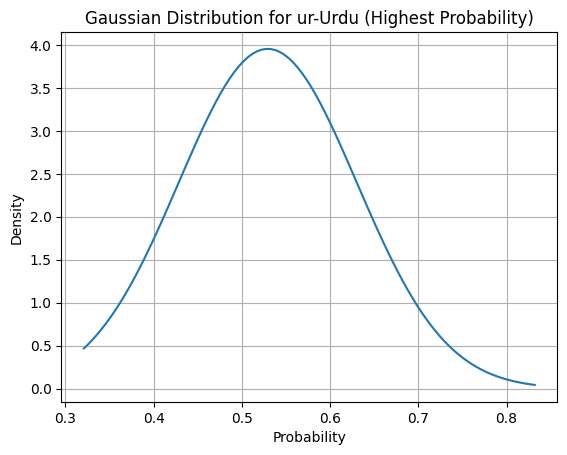

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# ... (Previous code for collecting probabilities and instances)

# Plot Gaussian distribution for each class separately
for label, data in class_data.items():
    probs = np.array(data['probs'])  # Convert list to NumPy array for norm.fit()

    # Fit a Gaussian distribution to the probabilities
    mu, std = norm.fit(probs)

    # Generate x-values for the Gaussian curve
    x = np.linspace(probs.min(), probs.max(), 100)

    # Calculate the corresponding y-values (PDF)
    y = norm.pdf(x, mu, std)

    plt.figure()
    plt.plot(x, y)
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.title(f'Gaussian Distribution for {label} (Highest Probability)')
    plt.grid(True)
    plt.show()


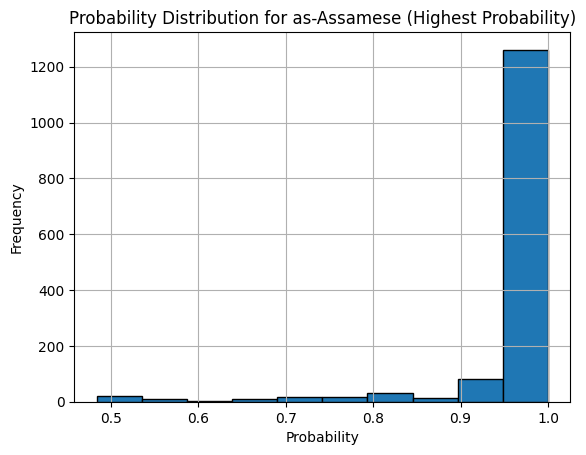

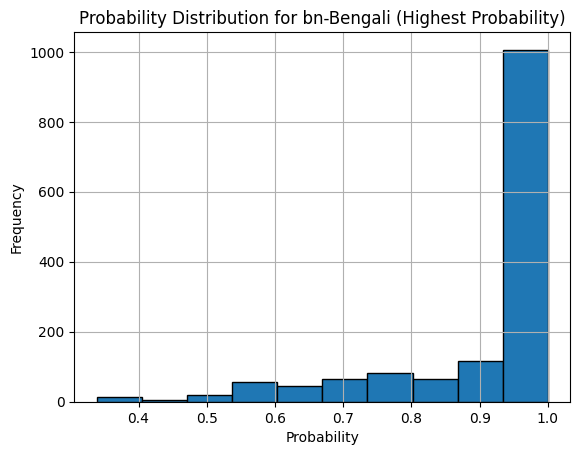

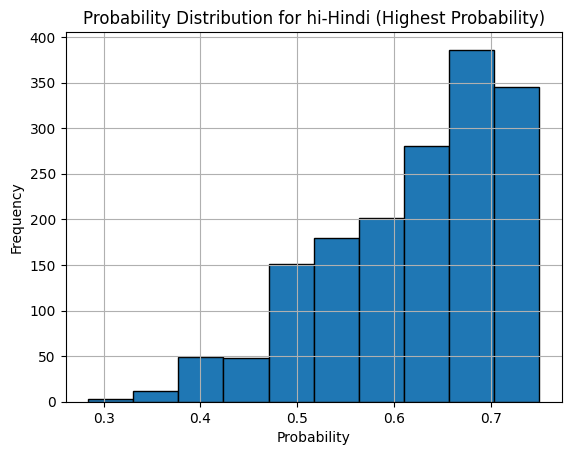

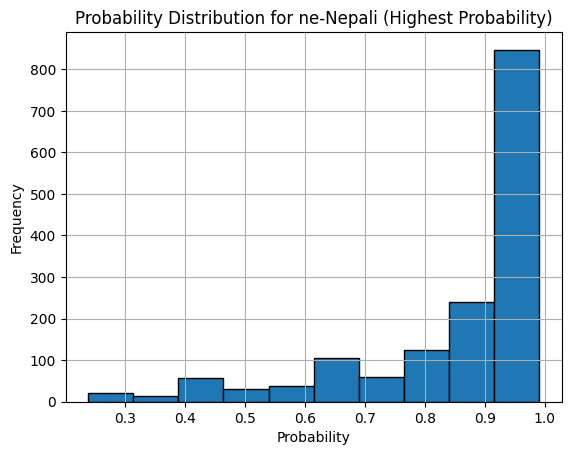

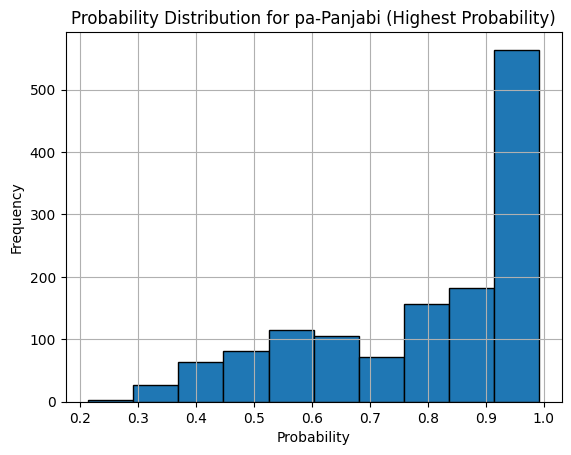

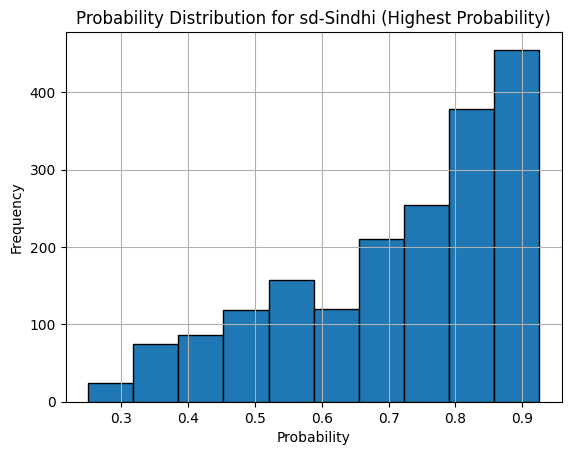

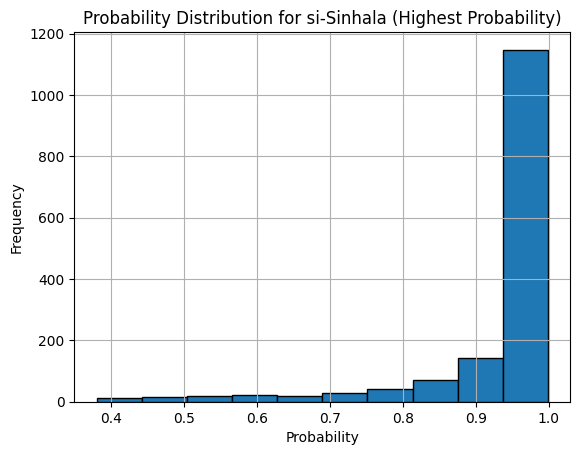

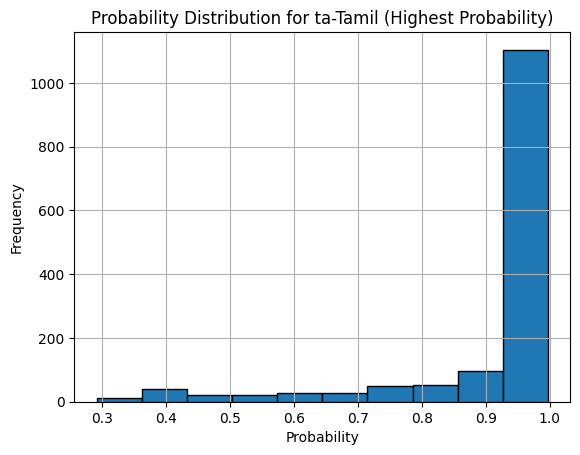

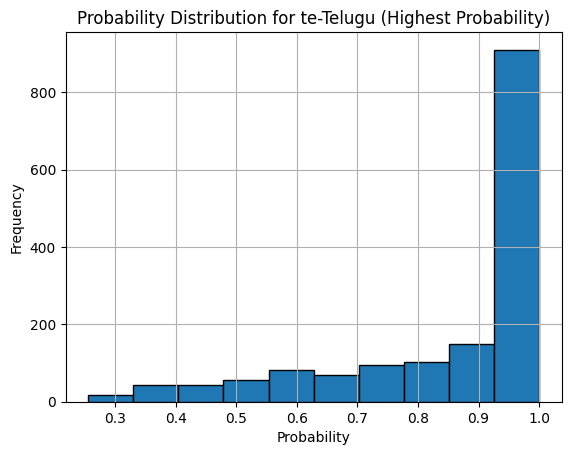

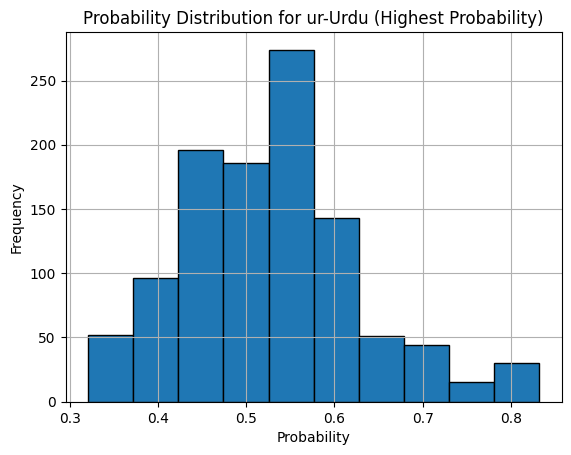

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for each class separately
for label, data in class_data.items():
    probs = data['probs']
    plt.figure()
    plt.hist(probs, bins=10, edgecolor='black')  # Adjust bins as needed
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.title(f'Probability Distribution for {label} (Highest Probability)')
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np


# Get unique class labels
class_labels = np.unique(y_test_scaled)

# Create a dictionary to store highest probabilities for each class
highest_probs = {label: [] for label in class_labels}

# Append highest probabilities to corresponding classes
for probs in class_probabilities:
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]
    highest_probs[predicted_class].append(highest_prob)

# Calculate mean, standard deviation, and threshold for each class
for label, probs in highest_probs.items():
    probs_array = np.array(probs)
    mean_prob = np.mean(probs_array)
    std_dev = np.std(probs_array)
    threshold = mean_prob - std_dev
    print(f"Class {label}:")
    print(f"  Mean Probability: {mean_prob:.4f}")
    print(f"  Standard Deviation: {std_dev:.4f}")
    print(f"  Threshold (Mean - Std Dev): {threshold:.4f}")

Class as-Assamese:
  Mean Probability: 0.9698
  Standard Deviation: 0.0849
  Threshold (Mean - Std Dev): 0.8849
Class bn-Bengali:
  Mean Probability: 0.9108
  Standard Deviation: 0.1439
  Threshold (Mean - Std Dev): 0.7669
Class hi-Hindi:
  Mean Probability: 0.6270
  Standard Deviation: 0.0947
  Threshold (Mean - Std Dev): 0.5323
Class ne-Nepali:
  Mean Probability: 0.8554
  Standard Deviation: 0.1695
  Threshold (Mean - Std Dev): 0.6859
Class pa-Panjabi:
  Mean Probability: 0.7935
  Standard Deviation: 0.1932
  Threshold (Mean - Std Dev): 0.6003
Class sd-Sindhi:
  Mean Probability: 0.7158
  Standard Deviation: 0.1668
  Threshold (Mean - Std Dev): 0.5490
Class si-Sinhala:
  Mean Probability: 0.9389
  Standard Deviation: 0.1168
  Threshold (Mean - Std Dev): 0.8222
Class ta-Tamil:
  Mean Probability: 0.9194
  Standard Deviation: 0.1535
  Threshold (Mean - Std Dev): 0.7659
Class te-Telugu:
  Mean Probability: 0.8594
  Standard Deviation: 0.1858
  Threshold (Mean - Std Dev): 0.6736
Class u

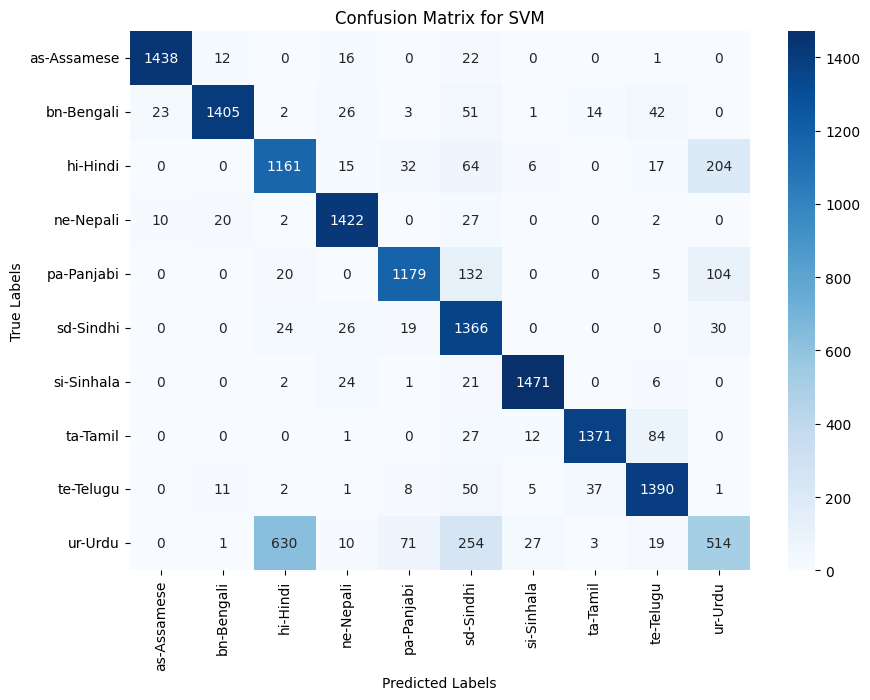

In [ ]:
# Train multi-class SVM with probability estimation
svm_model = SVC(kernel='rbf', probability=True)  # Choose an appropriate kernel
svm_model.fit(X_train_scaled, y_train_scaled)

# Predict classes using the trained SVM model
y_pred = svm_model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_scaled, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_scaled),
            yticklabels=np.unique(y_test_scaled))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()